This module will focus on why Early stopping will be treat as a regularizer like L2 regularizer.
The basic intuition behind early stopping is that the training will stop if loss is optimal.

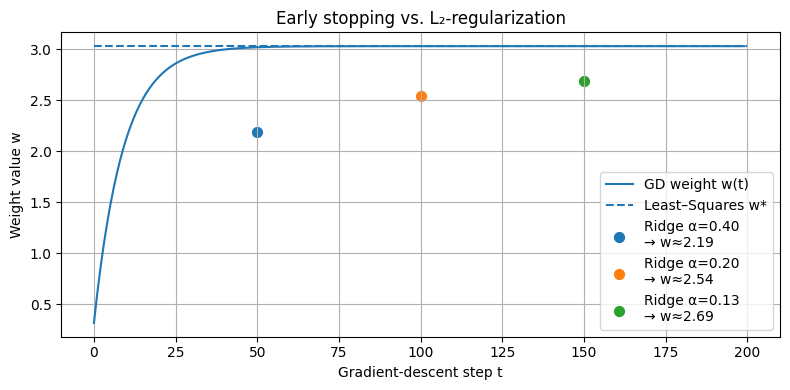

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate 1D data: y = w_true * x + noise
np.random.seed(0)
N = 200
x = np.random.randn(N, 1)
w_true = 3.0
y = x * w_true + 0.5 * np.random.randn(N, 1)

# 2) Compute the closed‐form least‐squares solution (no regularization)
#    w_ls = (XᵀX)⁻¹ Xᵀ y
XTX = (x.T @ x)   # scalar since x∈ℝᴺˣ¹
XTy = (x.T @ y)
w_ls = (XTy / XTX).item()

# 3) Run gradient descent on MSE starting from w=0, record w(t)
eta = 0.05       # learning rate
T   = 200        # max iterations
w = 0.0
ws = []
for t in range(T):
    # gradient of (1/N)‖Xw - y‖² wrt w is (2/N) xᵀ(Xw - y)
    grad = (2.0 / N) * (x.T @ (x * w - y))
    w -= eta * grad
    ws.append(w.item())

# 4) Compute ridge solutions for α ≈ 1/(η⋅τ) at τ = 50, 100, 150
### L2 Regularization
sig2 = (XTX / N).item()   # empirical variance of x
taus  = [50, 100, 150]
alphas  = [1.0 / (eta * tau) for tau in taus]
w_ridge = [w_ls * (sig2 / (sig2 + α)) for α in alphas]

# 5) Plot w(t) vs iterations and overlay ridge points
plt.figure(figsize=(8,4))
plt.plot(ws, label='GD weight w(t)')
plt.hlines(w_ls, 0, T, linestyles='--', label='Least–Squares w*')

for α, τ, wr in zip(alphas, taus, w_ridge):
    plt.scatter(τ, wr, s=50,
                label=f'Ridge α={α:.2f}\n→ w≈{wr:.2f}')

plt.xlabel('Gradient‐descent step t')
plt.ylabel('Weight value w')
plt.title('Early stopping vs. L₂‐regularization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The above graph shows the Gradient Descent with L2 Regularizer and the early stopping.

Dashed horizontal line: The unregularized solutiion if you run the training forever
Blue curve: Gradient-Descent curve
Early stopping points: Points when t = 50, t = 100, t = 150. Ridge alpha = ... indicate the strength of penalty, which also strink the weights toward 0.

Stopping GD at t gives the same shrinkage as Ridge (L2) with alpha

Key takeaways:

Early stopping = implicit L₂: By halting training at step 𝜏, you automatically impose the same weight-shrinkage you’d get by setting 𝛼≈1/(𝜂𝜏) in Ridge.

Control model complexity: 
– Smaller 𝜏(stop sooner) ⇒ stronger shrink ⇒ smaller 𝑤⇒ higher bias, lower variance. 
– Larger 𝛼 in Ridge ⇒ same effect.

Visual match: The fact that each Ridge-dot lies exactly on the GD curve at that 𝜏 drives home their equivalence under a quadratic loss.